# <center>MatPlotLib </center>

In [14]:
# Jupyter command, to show plots inside the notebook
%matplotlib inline
import matplotlib

In [15]:
# import Pandas
import pandas as pd

# import data, (some temperature data)
df = pd.read_table('sample.txt')

#print df
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40


In [16]:
# Parce Dates
df = pd.read_table('sample.txt', parse_dates=['Year'])

#set index the year column
df = df.set_index(['Year'])

df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880-01-01,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881-01-01,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882-01-01,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883-01-01,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884-01-01,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885-01-01,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886-01-01,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887-01-01,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40


### Matplotlib Magic:

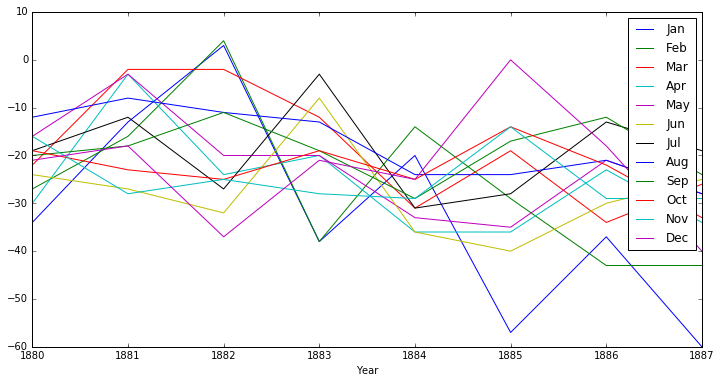

In [17]:
# use the .plot() command 
df.plot(figsize=(12,6))

<img src="img/bokeh_head.jpg">



## 3 Levels of bokeh charts interfaces


<img src="img/bokeh_levels.jpg">

In [18]:
from bokeh.models import HoverTool 
from bokeh.charts import Line, output_notebook, show, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [19]:
df_bokeh = pd.read_table('sample.txt')
df_bokeh

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40


In [20]:
# Make a list with the months.  #append#
ys = [month for month in df_bokeh.columns[1:] ]



# Define Tools                                
TOOLS='pan,wheel_zoom,hover,crosshair,resize,reset'                               

# Hover Tool configuration
TOOLTIPS = [   ("Year", "$~x"), #(label, axis)
               ("Temp", "$y")]

#make our line configurations
#import from df, x= the Year column, y = the ys list we created above
p = Line(df_bokeh, x = 'Year', y = ys , title="Hight Level Bokeh Line Chart", legend="bottom_left",
         ylabel='Temp', width = 800, height = 550, tools = TOOLS)

#hover tool configuration
p_hover = p.select(HoverTool)
p_hover.tooltips = TOOLTIPS

show(p)

# <center> Pygal </center>

In [21]:
import pygal

In [22]:
df_pygal = pd.read_table('sample.txt')
df_pygal

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40


In [23]:
# Define type of Chart
line_chart = pygal.Line()

line_chart.title = 'Pygal Example'

# make x labels (  map(function, iterable)
line_chart.x_labels = map(str, range(1880, 1888))

# Make a list with the months
ys = [i for i in df_pygal.columns[1:] ]

# ======== The Long way ===========
# line_chart.add('Jan', df['Jan'].tolist() )
# line_chart.add('Feb', df['Feb'].tolist() )
# line_chart.add('Mar', df['MAr'].tolist() )
# ============================================

# =============The fast way ================

# a for loop to make all the lines
for month in ys:
    line_chart.add( month, df[month].tolist())
    
# opens in new tab
line_chart.render_in_browser()

file://C:/Users/levan/AppData/Local/Temp/tmpp5kghq9z.html
